In [39]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [40]:
# load dataframe
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [41]:
# dropping usless columns
useless_columns = ['imdb_id' , 'tagline' , 'homepage' , 'budget_adj' , 'revenue_adj' , 'vote_count' , 'vote_average' , 'production_companies' , 'overview' , 'keywords' , 'id']

movies_data = movies_data.drop(useless_columns , 1)

In [42]:
# checking and dropping duplicates 
sum(movies_data.duplicated())
movies_data.drop_duplicates(keep = 'first' , inplace = True)
sum(movies_data.duplicated())

0

In [43]:
# replacing 0's with NaN
change_list = ['revenue' , 'budget']
movies_data[change_list] = movies_data[change_list].replace(0 , np.NAN)

# Now dropping NAN from the particular columns
movies_data.dropna(subset = change_list , inplace = True)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 331.2+ KB


In [44]:
# checking and changing datatypes
movies_data.dtypes

# changing the dtypes of budget and revenue columns
change_dtypes = ['budget' , 'revenue']
movies_data[change_dtypes] = movies_data[change_dtypes].applymap(np.int64)

In [45]:
# for calculating profit of all movies and then storing them in a seperate column,we will use the .insert() function
movies_data.insert(2 , 'profit_earned' , movies_data['revenue'] - movies_data['budget'])

In [46]:
# index of the movie which earned the most profit
movies_data['profit_earned'].idxmax()

# getting details about that movie using the idxmax returned
pd.DataFrame(movies_data.loc[1386])

,1386
popularity,9.43277
budget,237000000
profit_earned,2544505847
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,12/10/09


In [47]:
# index of the movie which earned minimum profit
movies_data['profit_earned'].idxmin()

# getting details about that movie using the idxm returned
pd.DataFrame(movies_data.loc[2244])

,2244
popularity,0.25054
budget,425000000
profit_earned,-413912431
revenue,11087569
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
release_date,12/2/10


In [48]:
# getting the index for the longest movie
movies_data['runtime'].idxmax()

# getting details for the longest movie
pd.DataFrame(movies_data.loc[2107])

,2107
popularity,0.534192
budget,18000000
profit_earned,-17128721
revenue,871279
original_title,Carlos
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Olivier Assayas
runtime,338
genres,Crime|Drama|Thriller|History
release_date,5/19/10


In [49]:
# getting the index for the shortest movie
movies_data['runtime'].idxmin()

# getting details for the shortest movie
pd.DataFrame(movies_data.loc[5162])

,5162
popularity,0.208637
budget,10
profit_earned,-5
revenue,5
original_title,Kid's Story
cast,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Shinichiro Watanabe
runtime,15
genres,Science Fiction|Animation
release_date,6/2/03


In [50]:
# getting the index for the movie with higest budget
movies_data['budget'].idxmax()

# getting details for the movie with higest budget
pd.DataFrame(movies_data.loc[2244])


,2244
popularity,0.25054
budget,425000000
profit_earned,-413912431
revenue,11087569
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
release_date,12/2/10


In [51]:
# getting the index for the movie with lowest budget
movies_data['budget'].idxmin()

# getting details for the movie with lowest budget
pd.DataFrame(movies_data.loc[2618])

,2618
popularity,0.090186
budget,1
profit_earned,99
revenue,100
original_title,Lost & Found
cast,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Jeff Pollack
runtime,95
genres,Comedy|Romance
release_date,4/23/99


In [52]:
# getting the index for the movie with higest revenue
movies_data['revenue'].idxmax()

# getting details for the movie with higest budget
pd.DataFrame(movies_data.loc[1386])

,1386
popularity,9.43277
budget,237000000
profit_earned,2544505847
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,12/10/09


In [53]:
# getting the index for the movie with lowest revenue
movies_data['revenue'].idxmin()


# getting details for the movie with lowest revenue
pd.DataFrame(movies_data.loc[5067])

,5067
popularity,0.462609
budget,6000000
profit_earned,-5999998
revenue,2
original_title,Shattered Glass
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,Billy Ray
runtime,94
genres,Drama|History
release_date,11/14/03


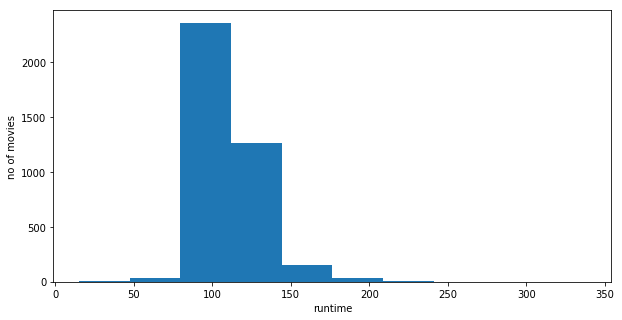

In [54]:
# getting average runtime for movies
movies_data['runtime'].mean()

# plotting the histograme for runtime of all movies
plt.figure(figsize = (10 , 5))
plt.hist(movies_data['runtime'])
plt.xlabel('runtime')
plt.ylabel('no of movies')
plt.show()

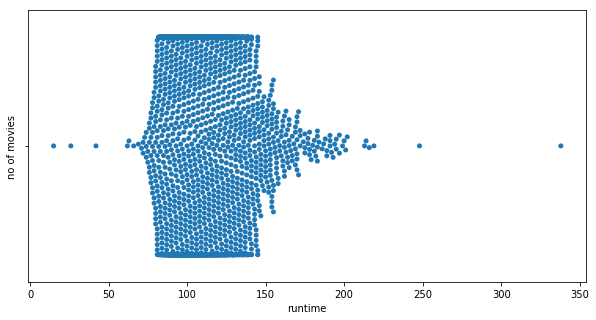

In [57]:
# plotting a swarmplot of runtime using seaborn

plt.figure(figsize = (10 , 5))
sns.swarmplot(movies_data['runtime'])
plt.xlabel('runtime')
plt.ylabel('no of movies')
plt.show()

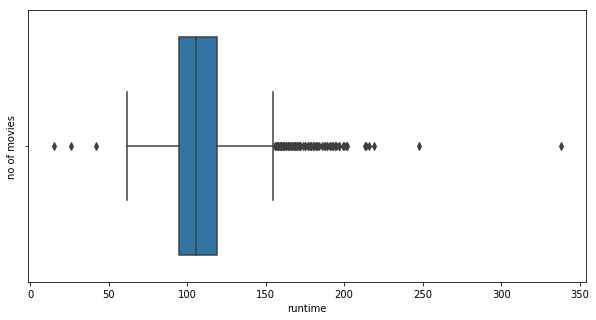

In [58]:
# plotting a boxplot of runtime using seaborn

plt.figure(figsize = (10 , 5))
sns.boxplot(movies_data['runtime'])
plt.xlabel('runtime')
plt.ylabel('no of movies')
plt.show()

In [59]:
movies_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

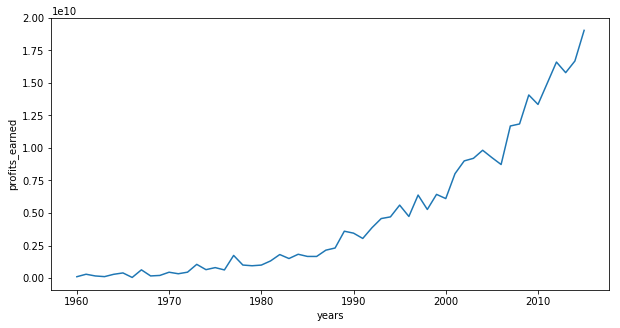

In [65]:
# plotting a graph of year of release vs profits earned

profits_earned_all_years = movies_data.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize = (10 , 5))
plt.plot(profits_earned_all_years)
plt.xlabel('years')
plt.ylabel('profits_earned')
plt.show()

In [72]:
# now we will analyse the most profitable movies in the light of the fact that we will create a new list which contains only those movies which have earned $ 50 million or more

most_profitable_movies = movies_data[movies_data['profit_earned'] >=50000000]
most_profitable_movies.describe()

,popularity,budget,profit_earned,revenue,runtime,release_year
count,1338.000000,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,2.021669,6.044496e+07,1.945127e+08,2.549577e+08,113.667414,2002.357997
std,2.104147,5.277078e+07,2.019087e+08,2.341753e+08,20.913166,10.639096
min,0.131526,1.130000e+02,5.002009e+07,5.152517e+07,69.000000,1961.000000
25%,0.955542,2.200000e+07,7.712958e+07,1.151022e+08,98.000000,1997.000000
50%,1.462309,4.500000e+07,1.240835e+08,1.747997e+08,110.000000,2005.000000
75%,2.389304,8.175000e+07,2.285696e+08,3.056946e+08,126.000000,2011.000000
max,32.985763,3.800000e+08,2.544506e+09,2.781506e+09,216.000000,2015.000000


In [77]:
# we will define a function in order to calculate average budge , average profit and average runtime
def average_of(column):
    return most_profitable_movies[column].mean()

# calling the above function
print("the average budget of most profitable movies is $ " + str(int(average_of('budget'))))

print("the average  profit of most profitable movies is $ " + str(int(average_of('profit_earned'))))

print("the average runtime of most profitable movies is (in minutes) " + str(int(average_of('runtime'))))

the average budget of most profitable movies is $ 60444957
the average  profit of most profitable movies is $ 194512704
the average runtime of most profitable movies is (in minutes) 113
